## Model Selection using RFE (Biking Case Study)

## **Problem Statement:**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

*Essentially, the company wants —*

1.   Which variables are significant in predicting the demand for shared bikes.
2.   How well those variables describe the bike demands

## Dataset characteristics / Attribute
*day.csv have the following fields:*
	

* instant: record index
* dteday : date
* season : season (1:spring, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2018, 1:2019)
* mnth : month ( 1 to 12)
* holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday*schedule)
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit : 
		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : temperature in Celsius
* atemp: feeling temperature in Celsius
* hum: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered


## Step 1: Reading and Understanding the Data

In [64]:
# Connecting to Google Drive to get the required CSV File for future reference 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [106]:
#importing all required python library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import sklearn
from sklearn.model_selection import  train_test_split

# to display all the column 
pd.options.display.max_columns = 999

In [141]:
# Importing Housing.csv
biking_data = pd.read_csv('/content/drive/MyDrive/Upgrad/ML/Assignment/day.csv')

In [130]:
#Looking at the first five rows
biking_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [126]:
biking_data.shape

(730, 16)

Inspect the various aspects of the biking dataframe

In [127]:
biking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [128]:
biking_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [129]:
# unique values
biking_data.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## Processing the Data Set 

In [142]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
biking_data["season"].replace([1,2,3,4],["spring","summer","fall","winter"], inplace=True)

##  year (0: 2018, 1:2019)
biking_data["yr"].replace([0,1],["2018","2019"], inplace=True)

##  weathersit 1: Clear , 2: Mist , 3: Light Snow , 4: Heavy Rain
biking_data["weathersit"].replace([1,2,3,4],["Clear","Mist","Light Snow","Heavy Rain" ], inplace=True)

## if day is neither weekend nor holiday is 1, otherwise is 0.
biking_data["holiday"].replace([0,1],["No","Yes"], inplace=True)

## if day is neither weekend nor holiday is 1, otherwise is 0.
biking_data["workingday"].replace([0,1],["No","Yes"], inplace=True)

##  Monday to Sunday
biking_data["weekday"].replace([0,1,2,3,4,5,6],["Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday","Monday" ], inplace=True)


In [133]:
print(biking_data['holiday'].value_counts())

No     709
Yes     21
Name: holiday, dtype: int64


**Interesting Data was found why printing Sunday and Monday is a holiday **

In [144]:
biking_data[["dteday","season","yr","weathersit","weekday","holiday", "workingday" ]].head(20)

,dteday,season,yr,weathersit,weekday,holiday,workingday
0,01-01-2018,spring,2018,Mist,Monday,No,No
1,02-01-2018,spring,2018,Mist,Tuesday,No,No
2,03-01-2018,spring,2018,Clear,Wednesday,No,Yes
3,04-01-2018,spring,2018,Clear,Thursday,No,Yes
4,05-01-2018,spring,2018,Clear,Friday,No,Yes
5,06-01-2018,spring,2018,Clear,Saturday,No,Yes
6,07-01-2018,spring,2018,Mist,Sunday,No,Yes
7,08-01-2018,spring,2018,Mist,Monday,No,No
8,09-01-2018,spring,2018,Clear,Tuesday,No,No
9,10-01-2018,spring,2018,Clear,Wednesday,No,Yes


In [145]:
# Dropping column that is not useful for data analysis
biking_data = biking_data.drop(columns=['instant', 'dteday'])

## Step 2: Visualising the Data
Most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

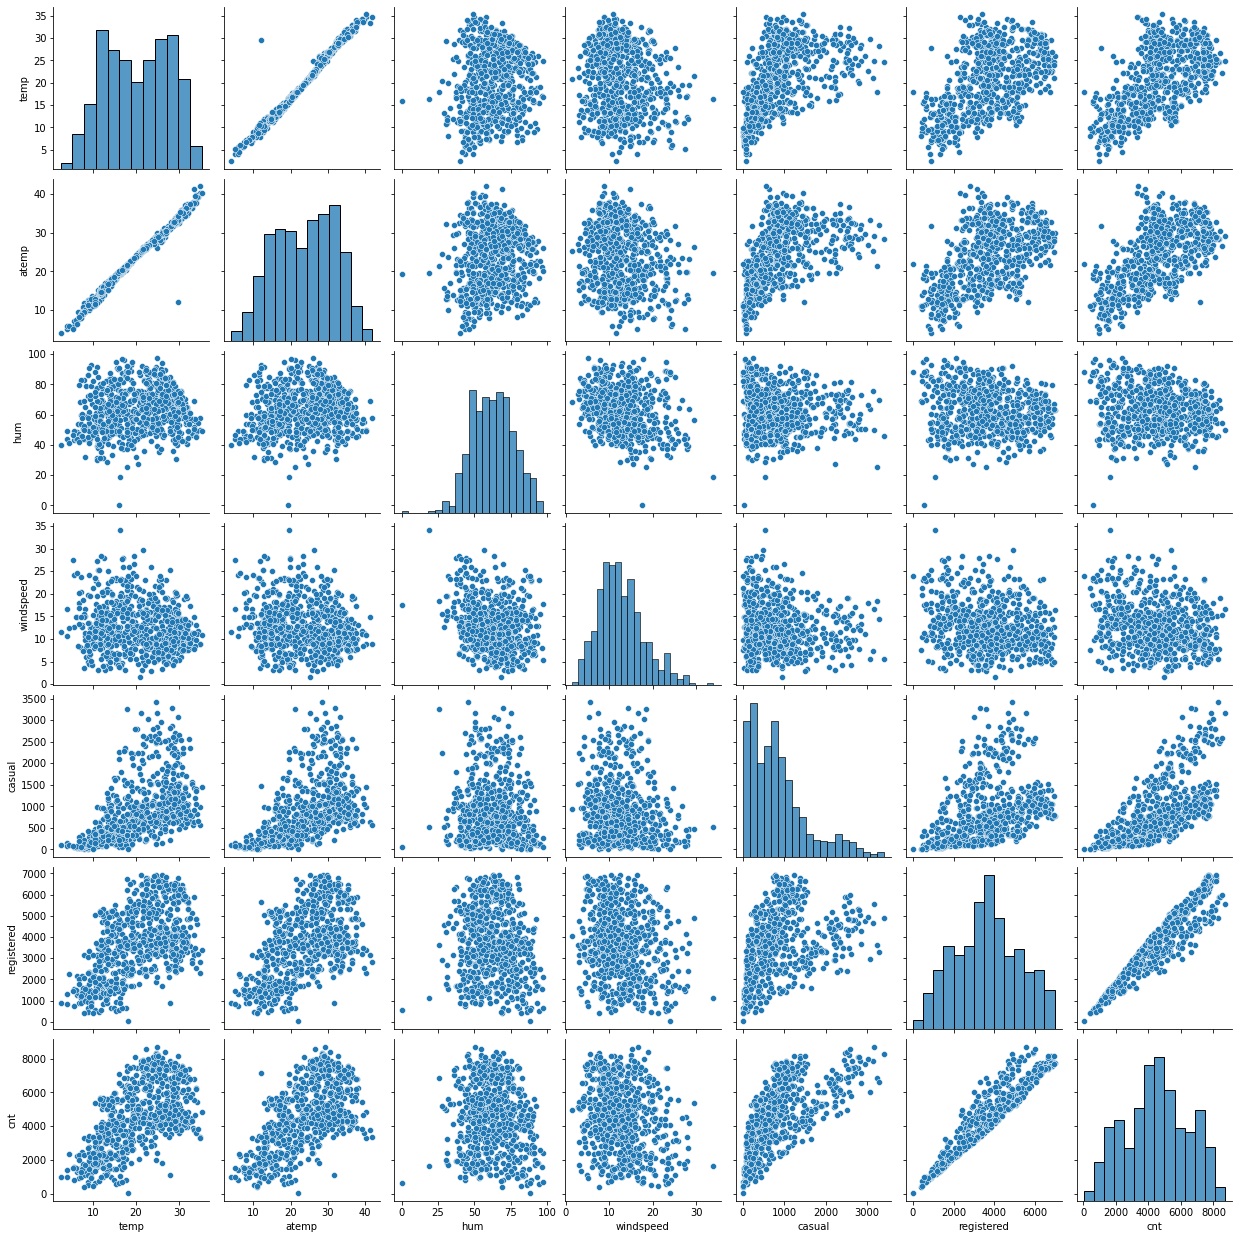

In [146]:
# visualising the numerical variable 
sns.pairplot(biking_data[['temp','atemp','hum','windspeed','casual','registered', 'cnt']])
plt.show()

# Data Observation from above chart
Elimiating the highly correlated variables colunm ***atemp, casual ,registered*** and check how the data is looking , need to validate and  drop the column 

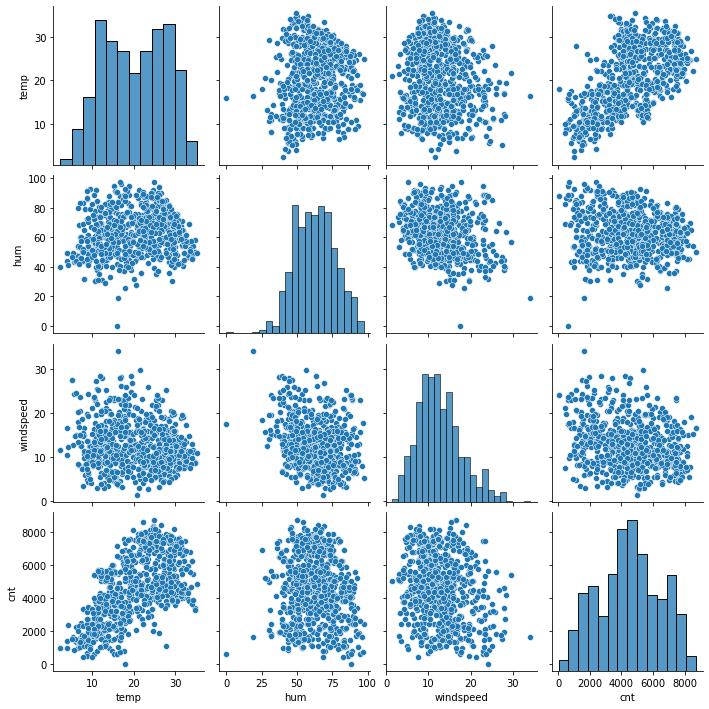

In [147]:
# visualising the numerical variable
# Elimiating the duplicate colunm 'atemp' 'casual','registered',
sns.pairplot(biking_data[['temp','hum','windspeed', 'cnt']])
plt.show()

#### Visualising Categorical Variables
There are a few categorical variables as well. Let's make a boxplot for some of these variables.

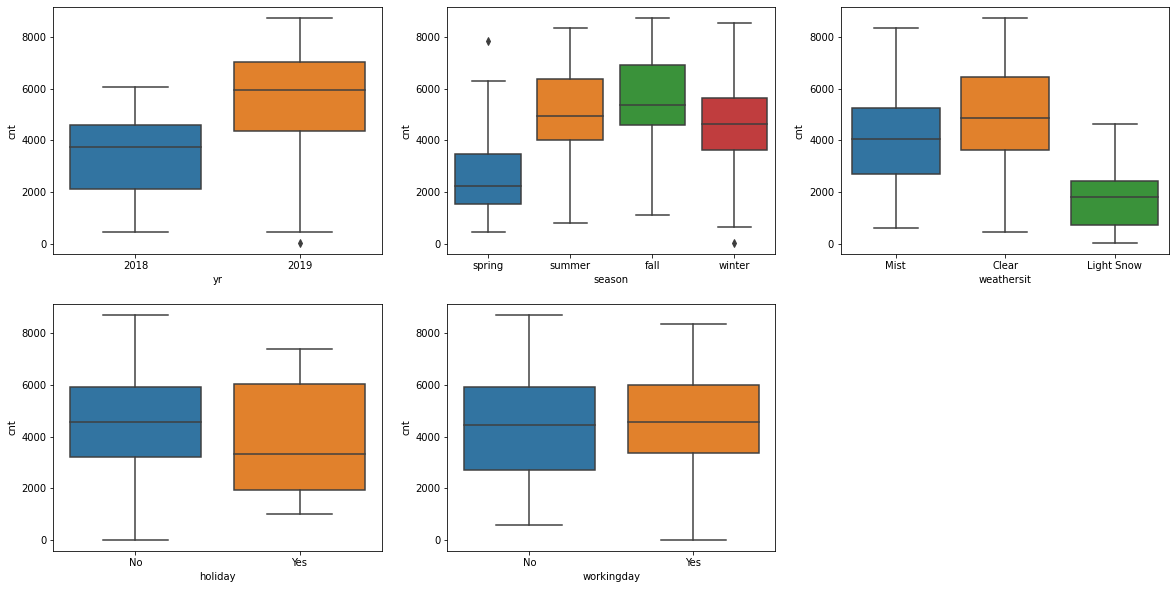

In [148]:
# Check the housing dataframe now

plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = biking_data)

plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = biking_data)

plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = biking_data)

plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = biking_data)

plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = biking_data)

plt.show()

# Data Observation from above chart


1.   More bikes rented in 2019
2.   Most rent happens in Fall, Summer, winter and spring
3.   Most Rent in Clear and Mist weather 
4.   Less Rent happening in No holiday 
4.   Rent are much busy in working Days



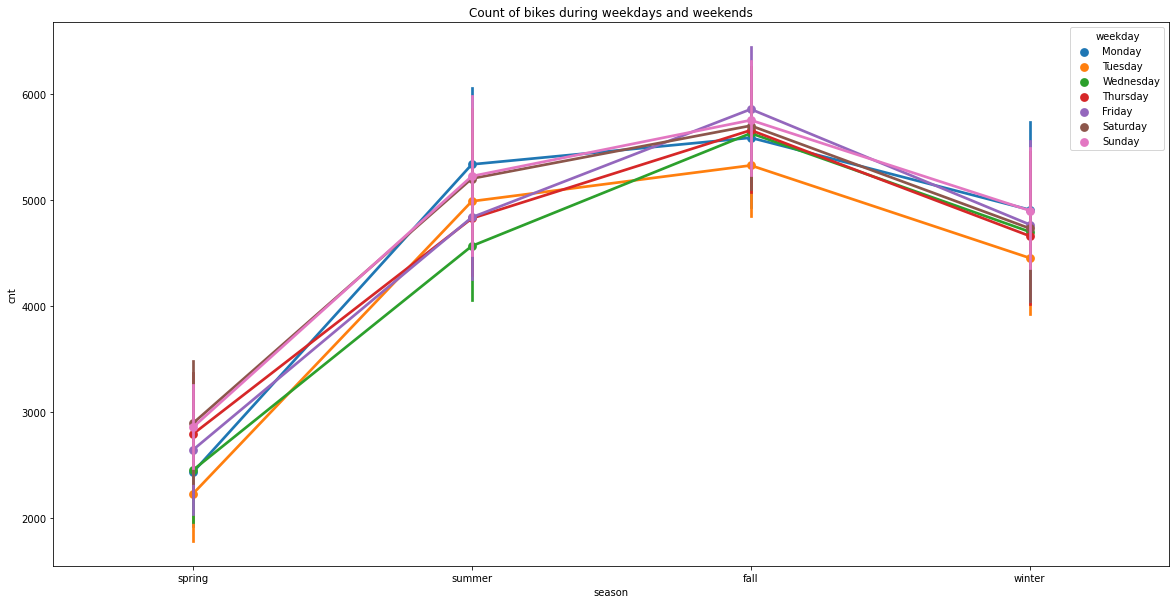

In [149]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=biking_data, x='season', y='cnt', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')
plt.show()

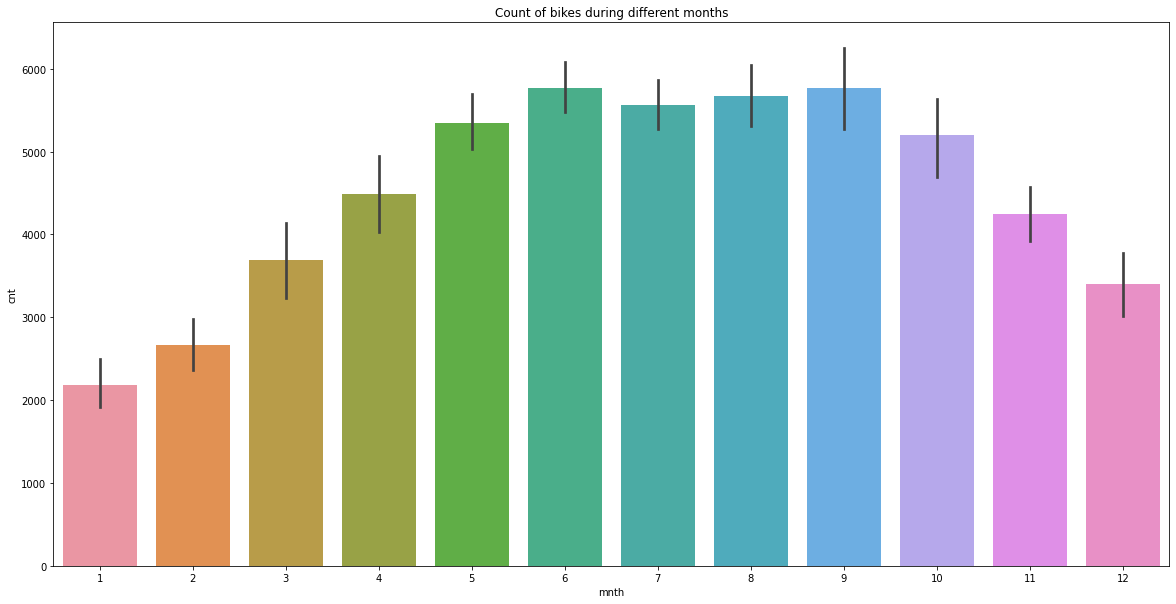

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=biking_data, x='mnth', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')
plt.show()

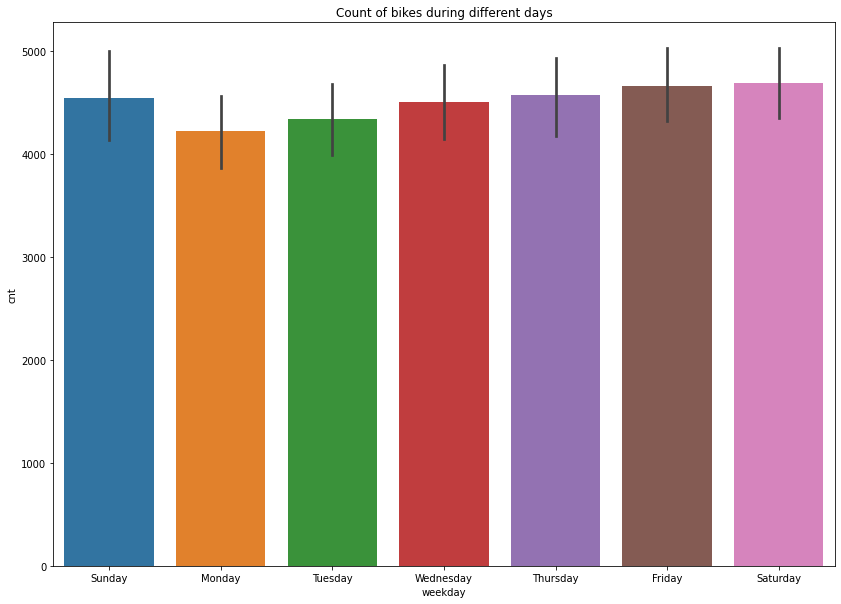

In [55]:
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=biking_data, x='weekday', y='cnt', ax=ax)
ax.set(title='Count of bikes during different days')
plt.show()

# Data Observation from above chart


1.   Friday , Saturday, Sunday are busy days 
2.   Less Rental on Monday and Tuesday
3.   Monday and Tuesday is not the working day for Bike company 


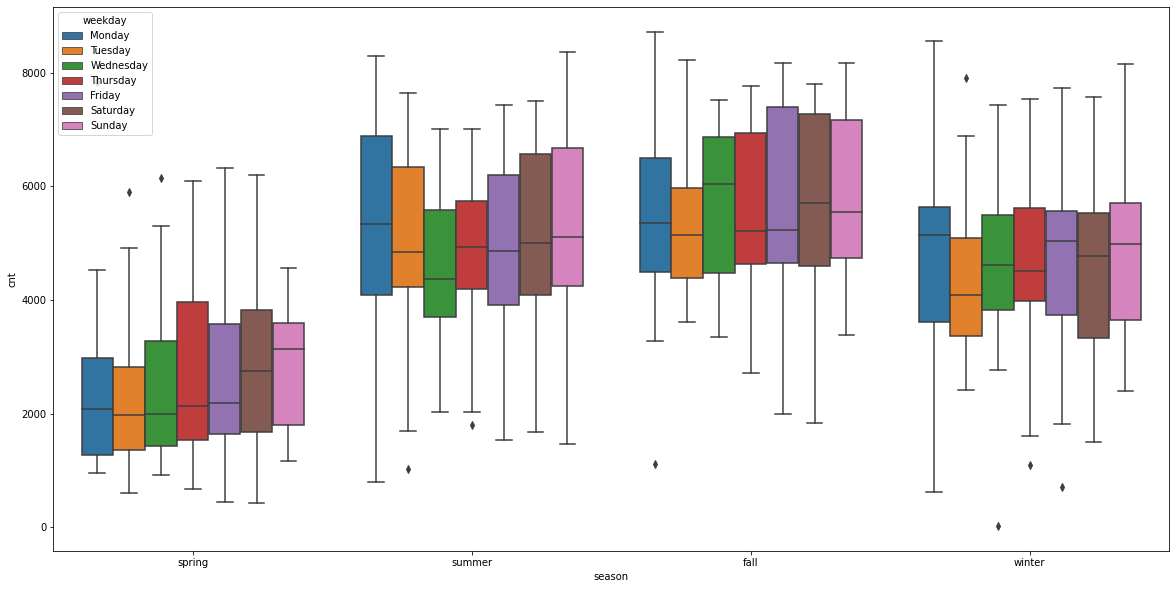

In [150]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weekday', data = biking_data)
plt.show()

# Data Observation from above chart


1.   Very few rental od days on winter and summer 
2.   Looks like ibe day in winter is high rental might be because on nice weather


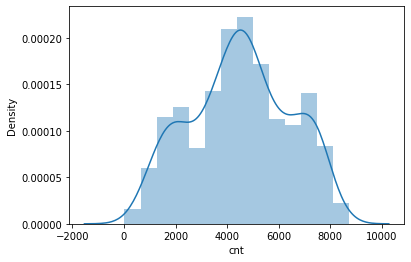

In [151]:
sns.distplot(biking_data["cnt"])
plt.show()

In [152]:
biking_data["cnt"] = np.log(biking_data["cnt"])

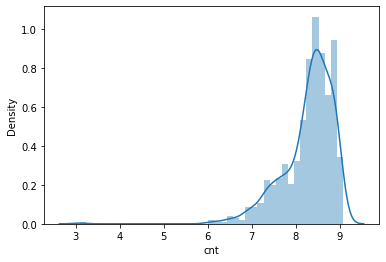

In [153]:
sns.distplot(biking_data["cnt"])
plt.show()

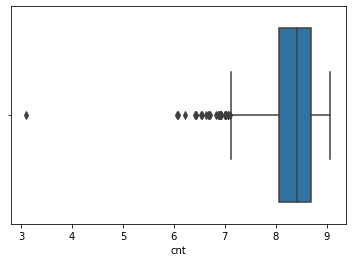

In [154]:
sns.boxplot(x="cnt",data=biking_data)
plt.show()

In [155]:
#Eliminare outliers (with residual less that stdev less than 3)
z = np.abs(stats.zscore(biking_data['cnt']))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
biking_data = biking_data[(z<=3)]

#find how many rows are left in the dataframe 
biking_data.shape


(722, 14)

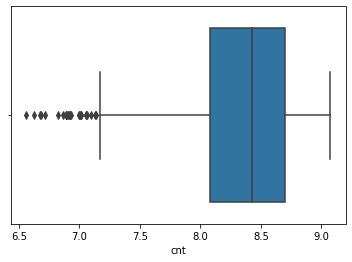

In [156]:
sns.boxplot(x="cnt",data=biking_data)
plt.show()

## Coorelation Matrix

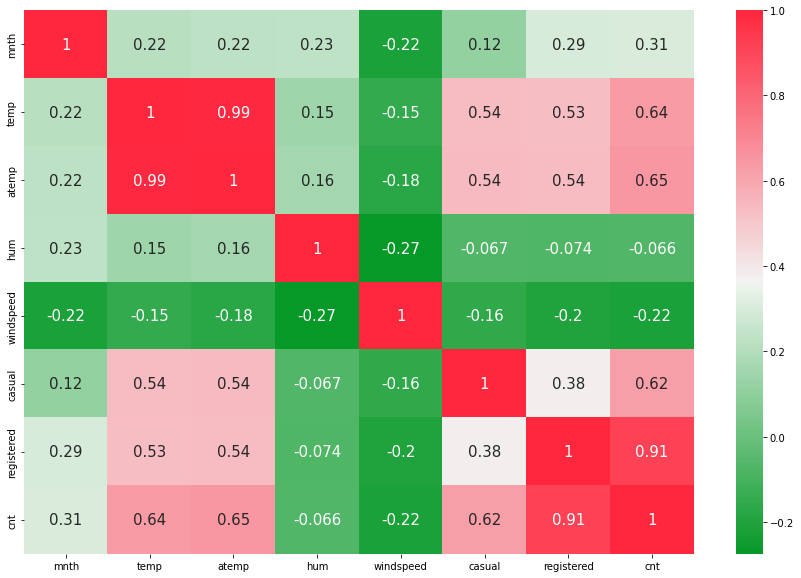

In [157]:
corr = biking_data.corr()
plt.figure(figsize=(15,10))
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(corr, annot=True, annot_kws={'size':15},cbar=True,cmap=rdgn)
plt.show()

# Data Observation from above Heatmap


1.   Temp and atemp are highlt correlated to be removed 
2.   casual and registered are also highly with count and to removed 
2.   Temp, hum and windspeed helps in the bike count number 

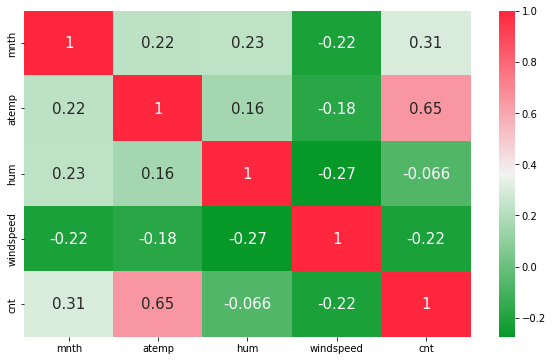

In [164]:
biking_data_test = biking_data.drop(columns=['temp', 'casual', 'registered'])

corr = biking_data_test.corr()
plt.figure(figsize=(10,6))
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(corr, annot=True, annot_kws={'size':15},cbar=True,cmap=rdgn)
plt.show()

### Dummy Variables (One hot Encoding)

In [165]:
# change int columns to category
cols = ['season','mnth','holiday','weekday','workingday','weathersit','yr']

for col in cols:
    biking_data_test[col] = biking_data_test[col].astype('category')
biking_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      722 non-null    category
 1   yr          722 non-null    category
 2   mnth        722 non-null    category
 3   holiday     722 non-null    category
 4   weekday     722 non-null    category
 5   workingday  722 non-null    category
 6   weathersit  722 non-null    category
 7   atemp       722 non-null    float64 
 8   hum         722 non-null    float64 
 9   windspeed   722 non-null    float64 
 10  cnt         722 non-null    float64 
dtypes: category(7), float64(4)
memory usage: 34.6 KB


In [122]:
pd.get_dummies(biking_data['season'], prefix='season', drop_first=True)

,season_spring,season_summer,season_winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [166]:

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','mnth','holiday','weekday','workingday','weathersit']

for col in cols:
    biking_data_test = one_hot_encoding(biking_data_test, col)
biking_data_test.head()

,yr,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
0,2018,18.18125,80.5833,10.749882,6.892642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2018,17.68695,69.6087,16.652113,6.685861,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2018,9.47025,43.7273,16.636703,7.207119,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,2018,10.60610,59.0435,10.739832,7.353722,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,2018,11.46350,43.6957,12.522300,7.377759,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
